In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Netflix Shows | EDA

In [6]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
df.shape

(8807, 12)

In [12]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [14]:
(df.isna().sum())/(df.shape[0])*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


**Replace NAN value with  `No data`**

In [15]:
df.fillna("No data" , inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [20]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


In [21]:
df["release_year"] = pd.to_datetime(df["release_year"] , format = "%Y").dt.year

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int32         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 791.4+ KB


In [23]:
df["released_month"] = df["date_added"].dt.month_name()

**Total number of movies and shows released in each months**

In [24]:
df_month_shows_movies = pd.DataFrame(df.groupby("released_month")["released_month"].count().sort_values(ascending = True)).rename(columns = {"released_month":"monthly_count"}).reset_index()
df_month_shows_movies

,released_month,monthly_count
0,February,557
1,May,626
2,November,697
3,June,724
4,January,727
5,March,734
6,August,749
7,October,755
8,April,759
9,September,765


In [25]:
fig=px.line(df_month_shows_movies,y='monthly_count',x= "released_month",title='Monthly movies and tv shows released' , markers = True)
fig.show()

**Total Number of Movies and Shows released  in each year**

In [26]:
df_year = pd.DataFrame(df.groupby("release_year")["release_year"].count().sort_values(ascending = False)).rename(columns = {"release_year":"count_of_Movies_Tvshows"}).reset_index()
df_year

,release_year,count_of_Movies_Tvshows
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1961,1
71,1947,1
72,1966,1


In [27]:
df_year

,release_year,count_of_Movies_Tvshows
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1961,1
71,1947,1
72,1966,1


In [28]:
fig = px.line(df_year , x = "release_year" , y = "count_of_Movies_Tvshows" , title = "Yearly Movies and TV Shows" , markers = True)
fig.show()

**Movies released After year 2000**

In [29]:
df_after_200 = pd.DataFrame(df[df["release_year"] > 2000].groupby("release_year")["release_year"].count().sort_values(ascending = False)).rename(columns = {"release_year":"count_of_movies_shows"}).reset_index()
df_after_200

,release_year,count_of_movies_shows
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


In [30]:
px.line(df_after_200  , x= "release_year" , y = "count_of_movies_shows" , markers = True , title = "count of Movies and Tv Shows released after year 2000")

**Movies VS Tv Shows**

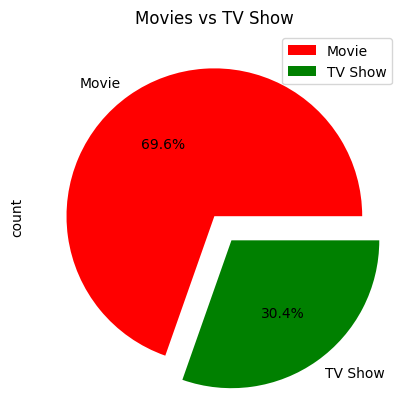

In [31]:
color = ["red" , "green"]
a = [0,0.2]
df["type"].value_counts().plot(kind = "pie" , autopct = "%0.1f%%" , colors = color , explode = a)
plt.title("Movies vs TV Show")
plt.legend()
plt.show()

**Rating**

In [32]:
df_rating = pd.DataFrame(df.groupby("rating")["rating"].count().sort_values(ascending = False).head(15)).rename(columns = {"rating":"rating_count"}).reset_index()
df_rating

,rating,rating_count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [33]:
fig = px.bar(df_rating , x = "rating" , y = "rating_count" , title = "Rating", color = "rating"  , hover_data = ["rating" , "rating_count"] , text = "rating_count")
fig.update_traces(textposition = "outside")
fig.show()


**Highest rating Mvoies and shows**

In [34]:
total_rating = pd.DataFrame(df["rating"].value_counts().head(3)).rename(columns = {"count":"total_count"}).reset_index()
total_rating

,rating,total_count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863


In [35]:
fig = px.pie(total_rating , values = "total_count" , names = "rating" , title = "Highest rating Shows")
fig.show()

**listed_in --> Dramas , crime , comedian**

In [36]:
# df["listed_in"].value_counts().sample(5)
a = pd.DataFrame(df["listed_in"].str.split(",").str[0])
a

,listed_in
0,Documentaries
1,International TV Shows
2,Crime TV Shows
3,Docuseries
4,International TV Shows
...,...
8802,Cult Movies
8803,Kids' TV
8804,Comedies
8805,Children & Family Movies


In [37]:

data_1 = (a[a["listed_in"].isin(["Crime TV Shows" , "Dramas" , "Comedies"])])
data_1

,listed_in
2,Crime TV Shows
7,Dramas
9,Comedies
10,Crime TV Shows
11,Crime TV Shows
...,...
8798,Comedies
8799,Dramas
8801,Dramas
8804,Comedies


In [38]:
df_listed_in = pd.DataFrame(data_1.groupby("listed_in")["listed_in"].count().sort_values(ascending = False)).rename(columns = {"listed_in":"count_listed_in"}).reset_index()
df_listed_in

,listed_in,count_listed_in
0,Dramas,1600
1,Comedies,1210
2,Crime TV Shows,399


In [ ]:
# import warnings

# warnings.filterwarnings(
#     action="ignore",
#     message=r"When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas\. Pass `\(name,\)` instead of `name` to silence this warning\.",
#     category=FutureWarning,
#     module=r"plotly\.express\._core",
# )

In [39]:
fig = px.bar(df_listed_in , x = "listed_in" , y = "count_listed_in" , color = "listed_in" , text = "count_listed_in")
fig.update_traces(textposition = "outside")
fig.show()

**listed_in --> Action & Adventure , Documentaries , Horror Movies**

In [40]:
b = pd.DataFrame(df["listed_in"].str.split(",").str[0])
b

,listed_in
0,Documentaries
1,International TV Shows
2,Crime TV Shows
3,Docuseries
4,International TV Shows
...,...
8802,Cult Movies
8803,Kids' TV
8804,Comedies
8805,Children & Family Movies


In [41]:
data_2 = (b[b["listed_in"].isin(["Action & Adventure" , "Documentaries" , "Horror Movies"])])
data_2

,listed_in
0,Documentaries
16,Documentaries
28,Horror Movies
36,Action & Adventure
38,Action & Adventure
...,...
8766,Action & Adventure
8767,Action & Adventure
8772,Action & Adventure
8790,Action & Adventure


In [42]:
df_listed_in2 = pd.DataFrame(data_2.groupby("listed_in")["listed_in"].count().sort_values(ascending = False)).rename(columns = {"listed_in":"count_listed_in"}).reset_index()
df_listed_in2

,listed_in,count_listed_in
0,Action & Adventure,859
1,Documentaries,829
2,Horror Movies,275


In [43]:
fig = px.bar(df_listed_in2 , x = "listed_in" , y = "count_listed_in" , color = "listed_in" , title = "Action & Adventure vs  Documentaries vs  Horror Movies" , text = "count_listed_in")
fig.update_traces(textposition = "outside")
fig.show()

**Function to count movies and tv shows of each genre**

In [44]:
def genre(country , genre = []):
    a = df[df["country"] == country]
    b = pd.DataFrame(a["listed_in"].str.split(",").explode().str.strip())
    c = b.value_counts().reset_index()
    d = c[c["listed_in"].isin([genre])]
    return d


genre("India" , "Action & Adventure")


,listed_in,count
4,Action & Adventure,127


**Count Movies and TV Show released each year**

In [45]:
df_type_year = pd.DataFrame(df.groupby(["type" , "release_year"])["type"].count().sort_values(ascending = False)).rename(columns = {"type":"type_count"}).reset_index()
df_type_year


,type,release_year,type_count
0,Movie,2017,767
1,Movie,2018,767
2,Movie,2016,658
3,Movie,2019,633
4,Movie,2020,517
...,...,...,...
114,TV Show,1979,1
115,TV Show,1981,1
116,TV Show,1985,1
117,TV Show,1989,1


In [46]:
fig = px.bar(df_type_year , x = "release_year" , y = "type_count" , color = "type" , title = "Year by Year movies and TV shows released")
fig.show()


**Total Number of movies and shows released in  each month**

In [47]:
df_count_month = pd.DataFrame(df.groupby("released_month")["released_month"].count().sort_values(ascending = True)).rename(columns = {"released_month":"count_by_movies_shows"}).reset_index()
df_count_month


,released_month,count_by_movies_shows
0,February,557
1,May,626
2,November,697
3,June,724
4,January,727
5,March,734
6,August,749
7,October,755
8,April,759
9,September,765


In [48]:
fig = px.bar(df_count_month , x = "released_month" , y = "count_by_movies_shows" ,color = "released_month" , title = "Total Number of shows released in each month" , text = "count_by_movies_shows" , color_discrete_sequence = px.colors.sequential.Viridis)
fig.update_traces(textposition = "outside")
fig.show()

**Total Number of Movies released in each year**

In [49]:
df_movies_year= pd.DataFrame(df[df["type"] == "Movie"].groupby("release_year")["release_year"].count().sort_values(ascending = False)).rename(columns = {"release_year":"count_of_movies"}).reset_index()
df_movies_year

,release_year,count_of_movies
0,2018,767
1,2017,767
2,2016,658
3,2019,633
4,2020,517
...,...,...
68,1961,1
69,1963,1
70,1966,1
71,1947,1


In [50]:
px.line(df_movies_year , x = "release_year" , y = "count_of_movies" , markers = True , title = "Number of movie by year")

**Number of movies released in each months**

In [51]:
new_df = df.copy()


In [52]:

month_order = ["January" , "February" , "March" , "April" , "May" , "June" , "July" , "August" , "September" , "October" , "November" , "December"]
new_df["released_month"] =pd.Categorical(df["released_month"] , categories = month_order , ordered = True)

new_df_movies_month = pd.DataFrame(new_df[new_df["type"] == "Movie"].groupby("released_month")["released_month"].count()).rename(columns = {"released_month":"count_of_movies"}).reset_index()
new_df_movies_month

<ipython-input-52-5caa9a20644c>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,released_month,count_of_movies
0,January,546
1,February,382
2,March,529
3,April,550
4,May,439
5,June,492
6,July,565
7,August,519
8,September,519
9,October,545


In [53]:
px.line(new_df_movies_month , x = "released_month" , y = "count_of_movies" , markers = True , title = "Number of movie by months")

**Number of shows released in each year**

In [54]:
df_shows_year = pd.DataFrame(df[df["type"]== "TV Show"].groupby("release_year")["release_year"].count().sort_values(ascending = False)).rename(columns = {"release_year":"count_of_shows"}).reset_index()
df_shows_year

,release_year,count_of_shows
0,2020,436
1,2019,397
2,2018,380
3,2021,315
4,2017,265
5,2016,244
6,2015,162
7,2014,88
8,2012,64
9,2013,63


In [55]:
px.line(df_shows_year , x = "release_year" , y = "count_of_shows" , markers = True , title = "Number of shows released by year")

**Number of Shows released in each Month**

In [56]:
new_df2 = df.copy()

In [57]:

month_order = ["January" , "February" , "March" , "April" , "May" , "June" , "July" , "August" , "September" , "October" , "November" , "December"]
new_df2["released_month"] =pd.Categorical(df["released_month"] , categories = month_order , ordered = True)

new_df_shows_month = pd.DataFrame(new_df2[new_df2["type"] == "TV Show"].groupby("released_month")["released_month"].count()).rename(columns = {"released_month":"count_of_shows"}).reset_index()
new_df_shows_month

<ipython-input-57-356ce87d351f>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,released_month,count_of_shows
0,January,181
1,February,175
2,March,205
3,April,209
4,May,187
5,June,232
6,July,254
7,August,230
8,September,246
9,October,210


In [58]:
px.line(new_df_shows_month , x = "released_month" , y = "count_of_shows" , markers = True , title = "Number of shows by month")

**Country & release_year**

In [59]:
def genre(country , release_year):

    a = df[(df["country"] == country) & (df["release_year"] == release_year)]
    b = pd.DataFrame(a.groupby("type")["type"].value_counts(ascending = False)).reset_index()
    return b


print(genre("India" ,2020))

      type  count
0    Movie     59
1  TV Show     16


In [60]:
genre("United States" ,2020)

,type,count
0,Movie,177
1,TV Show,159


In [61]:
genre("India" ,2019)

,type,count
0,Movie,74
1,TV Show,13


In [62]:
genre("United States" ,2019)

,type,count
0,Movie,217
1,TV Show,134


**Rating Column**

 - **G (General Audiences): All ages admitted. There is no content that would offend parents if viewed by children.**

 - **PG (Parental Guidance Suggested): Some material may not be suitable for children. Parents are urged to give "parental guidance." May contain some material parents might not like for their young children.**

- **PG-13 (Parents Strongly Cautioned): Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some content may be inappropriate for pre-teenagers.**

- **R (Restricted): Restricted to viewers over 17, unless accompanied by a parent or adult guardian. Contains some adult material. Parents are urged to learn more about the movie before taking their children to see it.**


- **NC-17 (Adults Only): No one 17 and under admitted. Clearly adult. Children are not admitted.**

In [63]:
df["rating"].isin(["R" , "NC-17" , "G"])

,rating
0,False
1,False
2,False
3,False
4,False
...,...
8802,True
8803,False
8804,True
8805,False


In [64]:
data_3 = df[df["rating"].isin(["R" , "NC-17" , "G"])]
data_3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,released_month
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...,September
48,s49,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,2021-09-16,2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...,September
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,2021-09-10,2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut...",September
107,s108,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,2021-09-04,2018,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,September
122,s123,Movie,In the Cut,Jane Campion,"Meg Ryan, Mark Ruffalo, Jennifer Jason Leigh, ...","United Kingdom, Australia, France, United States",2021-09-02,2003,R,118 min,Thrillers,After embarking on an affair with the cop prob...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States",2017-06-22,2017,R,81 min,Horror Movies,This four-part anthology of short horror films...,June
8768,s8769,Movie,Y Tu Mamá También,Alfonso Cuarón,"Maribel Verdú, Gael García Bernal, Diego Luna,...",Mexico,2017-06-01,2001,R,106 min,"Dramas, Independent Movies, International Movies",When rich teens Tenoch and Julio meet the allu...,June
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,November
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November


In [65]:
df_rating = pd.DataFrame(data_3.groupby("rating")["rating"].count().sort_values(ascending = False)).rename(columns = {"rating" :"count_rating"}).reset_index()
df_rating

,rating,count_rating
0,R,799
1,G,41
2,NC-17,3


In [66]:
fig = px.bar(df_rating  , x = "rating" , y = "count_rating" , color = "rating" , title = "R vs G vs NC-17" , text = "count_rating")
fig.update_traces(textposition = "outside")
fig.show()

In [67]:
df["duration"].value_counts().sample(10)

,count
duration,
24 min,23
196 min,1
147 min,12
157 min,6
131 min,34
107 min,98
172 min,4
120 min,56
2 Seasons,425


**Top country with maximum Number of movies and  Shows**

In [68]:
count_country_movies = df["country"].value_counts().sort_values(ascending = False).head(6)
total_country_movies = pd.DataFrame(count_country_movies.drop("No data")).rename(columns = {"count":"count_movies_shows"}).reset_index()
total_country_movies

,country,count_movies_shows
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [69]:
fig = px.bar(total_country_movies , x = "country" , y = "count_movies_shows" , color = "country" , title = "Top country with maximum total movies" , text = "count_movies_shows" , color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition = "outside")
fig.show()

**All the Comedies Movies - United States**

In [70]:
df[(df["listed_in"].str.split(",").str[0] == "Comedies") & (df["country"] == "United States")][["type" , "title" , "country" , "duration" , "listed_in" , "release_year"]].head(10)


,type,title,country,duration,listed_in,release_year
9,Movie,The Starling,United States,104 min,"Comedies, Dramas",2021
27,Movie,Grown Ups,United States,103 min,Comedies,2010
144,Movie,House Party,United States,104 min,"Comedies, Cult Movies",1990
145,Movie,House Party 2,United States,94 min,"Comedies, Cult Movies, Music & Musicals",1991
146,Movie,House Party 3,United States,94 min,"Comedies, Music & Musicals",1994
152,Movie,Janoskians: Untold and Untrue,United States,88 min,Comedies,2016
156,Movie,Letters to Juliet,United States,105 min,"Comedies, Dramas, Romantic Movies",2010
158,Movie,Love Don't Cost a Thing,United States,101 min,"Comedies, Romantic Movies",2003
161,Movie,Mars Attacks!,United States,106 min,"Comedies, Cult Movies, Sci-Fi & Fantasy",1996
163,Movie,My Boss's Daughter,United States,86 min,"Comedies, Romantic Movies",2003


**All the Thrillers Movies - United States**

In [71]:
df[(df["listed_in"].str.split(",").str[0] == "Thrillers") & (df["country"] == "United States")][["type" , "title" , "country" , "duration" , "listed_in" , "release_year"]].head(10)

,type,title,country,duration,listed_in,release_year
150,Movie,In Too Deep,United States,97 min,Thrillers,1999
358,Movie,The Net,United States,114 min,Thrillers,1995
600,Movie,The Game,United States,129 min,Thrillers,1997
622,Movie,Lying and Stealing,United States,100 min,Thrillers,2019
788,Movie,Domestic Disturbance,United States,89 min,Thrillers,2001
824,Movie,Welcome Home,United States,97 min,Thrillers,2018
866,Movie,Small Town Crime,United States,92 min,Thrillers,2017
1034,Movie,Synchronic,United States,102 min,Thrillers,2020
1046,Movie,Only Mine,United States,88 min,Thrillers,2019
1187,Movie,Deadly Illusions,United States,115 min,Thrillers,2021


**All the Documentaries Movies - United States**

In [72]:
df[(df["listed_in"].str.split(",").str[0] == "Documentaries") & (df["country"] == "United States")][["type" , "title" , "country" , "duration" , "listed_in" , "release_year"]].head(10)

,type,title,country,duration,listed_in,release_year
0,Movie,Dick Johnson Is Dead,United States,90 min,Documentaries,2020
96,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,United States,97 min,"Documentaries, Music & Musicals",2018
101,Movie,Untold: Breaking Point,United States,80 min,"Documentaries, Sports Movies",2021
170,Movie,Rhyme & Reason,United States,89 min,"Documentaries, Music & Musicals",1997
173,Movie,Snervous Tyler Oakley,United States,83 min,"Documentaries, LGBTQ Movies",2015
290,Movie,Untold: Malice at the Palace,United States,70 min,"Documentaries, Sports Movies",2021
317,Movie,Pray Away,United States,102 min,"Documentaries, LGBTQ Movies",2021
378,Movie,Fantastic Fungi,United States,81 min,Documentaries,2019
462,Movie,This Changes Everything,United States,96 min,Documentaries,2019
473,Movie,Born to Play,United States,93 min,"Documentaries, Sports Movies",2020


**All Dramas Movies released in 2021 from India**

In [73]:
df[(df["country"] == "India") & (df["release_year"] == 2021) & (df["listed_in"].str.split(",").str[0] == "Dramas")][["title" , "release_year"]]

,title,release_year
190,Thimmarusu,2021
850,99 Songs,2021
873,Ahaan,2021
903,Nayattu,2021
909,Milestone,2021
959,The Disciple,2021
1023,Ajeeb Daastaans,2021
1202,C/O Kaadhal,2021
1281,Red,2021
1410,Tribhanga - Tedhi Medhi Crazy,2021


**All Dramas Movies released in 2021 from United States**

In [74]:
df[(df["country"] == "United States") & (df["release_year"] == 2021) & (df["listed_in"].str.split(",").str[0] == "Dramas")][["title" , "release_year"]]

,title,release_year
685,Fatherhood,2021
746,Awake,2021
889,The Woman in the Window,2021
910,Monster,2021
1089,Two Distant Strangers,2021
1341,Malcolm & Marie,2021


**Number of Movies and Show from US**

In [75]:
df_US_movies_shows =pd.DataFrame(df[df["country"] == "United States"].groupby("type")["type"].count()).rename(columns = {"type":"count"}).reset_index()
df_US_movies_shows

,type,count
0,Movie,2058
1,TV Show,760


In [76]:
fig = px.bar(df_US_movies_shows,  x= "type" , y= "count" , color = "type" , text = "count" , title = "Number of movies and shows from United States")
fig.update_traces(textposition = "outside")
fig.show()

**Number of movies and shows from India**

In [77]:
df_India_movies_shows =pd.DataFrame(df[df["country"] == "India"].groupby("type")["type"].count()).rename(columns = {"type":"count"}).reset_index()
df_India_movies_shows

,type,count
0,Movie,893
1,TV Show,79


In [78]:
fig = px.bar(df_India_movies_shows,  x= "type" , y= "count" , color = "type" , text = "count" , title = "Number of movies and shows from India")
fig.update_traces(textposition = "outside")
fig.show()

**Number of movies and shows from United Kingdom**

In [79]:
df_UK_movies_shows =pd.DataFrame(df[df["country"] == "United Kingdom"].groupby("type")["type"].count()).rename(columns = {"type":"count"}).reset_index()
df_UK_movies_shows

,type,count
0,Movie,206
1,TV Show,213


In [80]:
fig = px.bar(df_UK_movies_shows,  x= "type" , y= "count" , color = "type" , text = "count" , title = "Number of movies and shows from United Kingdom")
fig.update_traces(textposition = "outside")
fig.show()

**Cast - Vicky Kaushal**

In [81]:
df[df["cast"].str.split(",").str[0] == "Vicky Kaushal"][["type" , "title" , "director" , "cast" , "country" , "rating" , "duration" , "release_year"]]

,type,title,director,cast,country,rating,duration,release_year
4825,Movie,Lust Stories,"Zoya Akhtar, Karan Johar, Anurag Kashyap, Diba...","Vicky Kaushal, Bhumi Pednekar, Radhika Apte, N...",India,TV-MA,121 min,2018
5040,Movie,Love Per Square Foot,Anand Tiwari,"Vicky Kaushal, Angira Dhar, Alankrita Sahai, R...",India,TV-14,133 min,2018
8806,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,TV-14,111 min,2015


**Cast - Sanjay Dutt**

In [82]:
df[df["cast"].str.split(",").str[0] == "Sanjay Dutt"][["type" , "title" , "director" , "cast" , "country" , "rating" , "duration" , "release_year"]]

,type,title,director,cast,country,rating,duration,release_year
195,Movie,EMI: Liya Hai To Chukana Padega,Saurabh Kabra,"Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...",India,TV-14,128 min,2008
1561,Movie,Torbaaz,Girish Malik,"Sanjay Dutt, Nargis Fakhri, Rahul Dev, Priyank...",India,TV-MA,133 min,2020
2725,Movie,Gumrah,Mahesh Bhatt,"Sanjay Dutt, Sridevi, Anupam Kher, Rahul Roy, ...",India,TV-14,149 min,1993
2916,Movie,Panipat - The Great Betrayal,Ashutosh Gowariker,"Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat...",India,TV-14,171 min,2019
3917,Movie,Shabd,Leena Yadav,"Sanjay Dutt, Aishwarya Rai Bachchan, Zayed Kha...",India,TV-14,146 min,2005
4790,Movie,Anthony Kaun Hai?,Raj Kaushal,"Sanjay Dutt, Arshad Warsi, Minissha Lamba, Rag...",India,TV-14,122 min,2006
6440,Movie,Chal Mere Bhai,David Dhawan,"Sanjay Dutt, Salman Khan, Karisma Kapoor, Dali...",India,TV-14,132 min,2000
6604,Movie,Dhamaal,Indra Kumar,"Sanjay Dutt, Riteish Deshmukh, Arshad Warsi, A...",India,TV-14,128 min,2007
6936,Movie,Haseena Maan Jaayegi,David Dhawan,"Sanjay Dutt, Govinda, Karisma Kapoor, Pooja Ba...",India,TV-PG,151 min,1999
7183,Movie,Khalnayak,Subhash Ghai,"Sanjay Dutt, Madhuri Dixit, Jackie Shroff, Anu...",India,TV-14,170 min,1993


**Cast - Shah Rukh Khan**

In [83]:
df[df["cast"].str.split(",").str[0] == "Shah Rukh Khan"][["type" , "title" , "director" , "cast" , "country" , "rating" , "duration" , "release_year"]]

,type,title,director,cast,country,rating,duration,release_year
301,Movie,Chennai Express,Rohit Shetty,"Shah Rukh Khan, Deepika Padukone, Nikitin Dhee...",India,TV-14,135 min,2013
2722,Movie,Duplicate,Mahesh Bhatt,"Shah Rukh Khan, Juhi Chawla, Sonali Bendre, Fa...",India,TV-14,165 min,1998
2732,Movie,Kal Ho Naa Ho,Nikkhil Advani,"Shah Rukh Khan, Saif Ali Khan, Preity Zinta, J...",India,TV-14,187 min,2003
2734,Movie,Kuch Kuch Hota Hai,Karan Johar,"Shah Rukh Khan, Kajol, Rani Mukerji, Farida Ja...",India,TV-14,185 min,1998
3133,Movie,Don,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Arjun Rampal,...",India,TV-14,169 min,2006
3134,Movie,Don 2,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Boman Irani, ...","India, Germany",TV-14,148 min,2011
3376,Movie,My Next Guest with David Letterman and Shah Ru...,Michael Steed,"Shah Rukh Khan, David Letterman",No data,TV-PG,61 min,2019
4792,Movie,Chalte Chalte,Aziz Mirza,"Shah Rukh Khan, Rani Mukerji, Jas Arora, Satis...",India,TV-14,166 min,2003
4952,Movie,Main Hoon Na,Farah Khan,"Shah Rukh Khan, Sunil Shetty, Sushmita Sen, Za...",India,TV-14,171 min,2004
4954,Movie,Om Shanti Om,Farah Khan,"Shah Rukh Khan, Deepika Padukone, Shreyas Talp...",India,TV-14,169 min,2007


In [84]:
df["cast"].sample(10)

,cast
6490,No data
2658,"Masakazu Morita, Fumiko Orikasa, Yuki Matsuoka..."
1726,No data
8368,Mickey Spillane
4810,"Adrián Uribe, Julieth Restrepo, Carlos Manuel ..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
142,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im..."
6212,"Will Smith, Martin Lawrence, Jordi Mollà, Gabr..."
5139,"Amyra Rosli, Fadlan Hazim, Maria Farida, Shari..."
8092,Jeffrey Hollender


In [85]:
cast= df[df["cast"].str.split(",").str[0].isin(["Saif Ali Khan" , "Ajay Devgn" , "Shah Rukh Khan"])]["cast"]
cast_name = pd.DataFrame(cast.str.split(",").str[0])

In [86]:
total_movies = pd.DataFrame(cast_name.groupby("cast")["cast"].count().sort_values(ascending  = False)).rename(columns = {"cast":"total_movies"}).reset_index()
total_movies

,cast,total_movies
0,Shah Rukh Khan,26
1,Ajay Devgn,16
2,Saif Ali Khan,7


In [87]:
fig = px.bar(total_movies , x = "cast" , y = "total_movies" , color = "cast" , text = "total_movies")
fig.update_traces(textposition = "outside")
fig.show()